In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
def show(x):
    plt.imshow(x, cmap='binary')

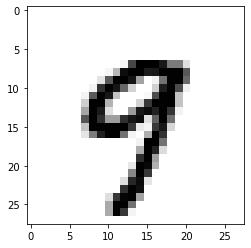

In [11]:
show(X_train[45])

In [13]:
X_train = tf.keras.utils.normalize(X_train)
X_test = tf.keras.utils.normalize(X_test)

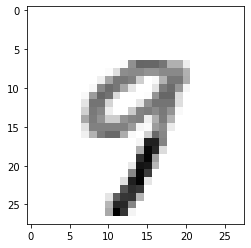

In [14]:
show(X_train[45])

In [8]:
from tensorflow.keras.layers import Dense, Flatten

In [9]:
from tensorflow.keras.models import Sequential

In [38]:
# Instantiating the model
model = Sequential()

# Adding layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
es = tf.keras.callbacks.EarlyStopping

In [40]:
callback = es(monitor='val_loss', patience=25, verbose=3)

In [41]:
model.fit(x= X_train, y=y_train, callbacks=[callback], epochs=3, verbose=3, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
Epoch 2/3
Epoch 3/3


In [42]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

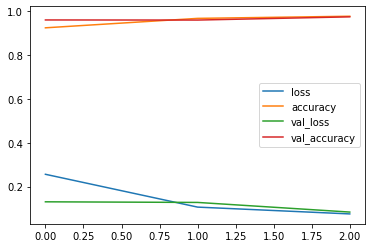

In [43]:
losses.plot()

In [44]:
pred = model.predict_classes(X_test)

In [45]:
testVal = model.predict_classes([[X_train[45]]])
testVal

array([9], dtype=int64)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
print(confusion_matrix(y_test, pred))

[[ 965    0    2    2    0    0    4    1    3    3]
 [   0 1118    5    0    0    1    2    1    8    0]
 [   2    0 1014    4    1    0    0    4    7    0]
 [   1    0    4  980    0    6    0    5   14    0]
 [   3    2    0    1  946    1    5    2    4   18]
 [   3    0    0    5    2  871    3    0    7    1]
 [   3    4    1    1    2    5  935    0    6    1]
 [   0    5   12    1    1    1    0  997    4    7]
 [   4    0    2    2    1    7    0    3  952    3]
 [   1    5    1    9    6    8    1    3    9  966]]


In [48]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.97      0.97      1010
           4       0.99      0.96      0.97       982
           5       0.97      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.94      0.98      0.96       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [49]:
from tensorflow import lite
converter = lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()
open ("digitClassifier.tflite" , "wb") .write(tfmodel)

474748